<a href="https://colab.research.google.com/github/monir383/oasis/blob/main/CUSTOMER_SEGMENTATION_TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***IMPORTING THE LIBRARIES***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# **LOADING THE DATA SET**

In [ ]:
#load the dataset
df = pd.read_csv("ifood_df.csv")

#DISPLAY FIRST ROW OF THE DATASET
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


# ***EXPLORING AND CLEANING THE DATA***

In [ ]:
# Check data types and nulls
df.info()


# Check missing values
df.isnull().sum()


# check basic statistics
df.describe()  # Basic stats


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


# ***DESCRIPTIVE STATISTICS ***

In [ ]:
#  Average purchase value
avg_purchase_value = df['MntTotal'].mean()
print(f"Average Purchase Value: {avg_purchase_value:.2f}")

# Frequency of purchases by customer
purchase_frequency = df['NumDealsPurchases'].mean()
print(f"Frequency of Purchases: {purchase_frequency:.2f}")

Average Purchase Value: 562.76
Frequency of Purchases: 2.32


# ***FEATURE ENGINEERING AND SCALING***

In [ ]:
# Create total amount spent column
df['MntTotal'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

 # Select features for clustering
features = df[['Income', 'Recency', 'MntWines', 'MntFruits',
               'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
               'MntGoldProds', 'MntTotal']]

 # Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)





# ***IMPLEMENTING CLUSTURING ALGORITHM***

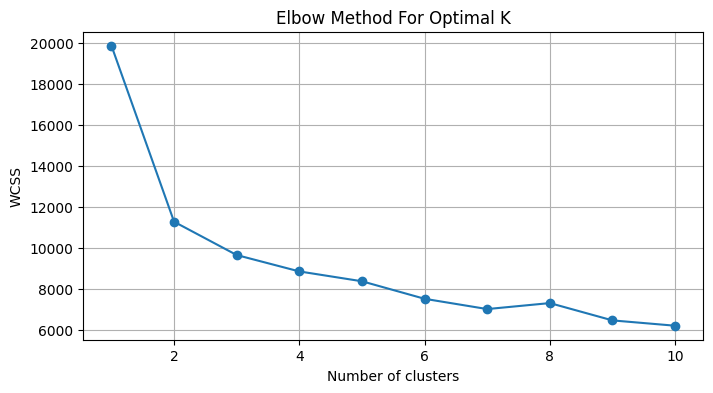

,count
Cluster,
2,1122
1,520
0,290
3,273


In [ ]:
#  Elbow method to find best k
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, wcss, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


#  Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Show cluster distribution
df['Cluster'].value_counts()


# ***VISUALIZATION OF CLUSTERS***

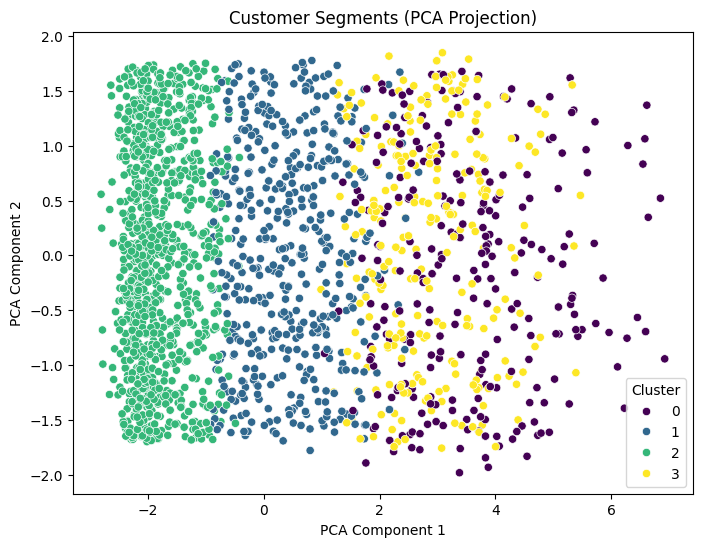

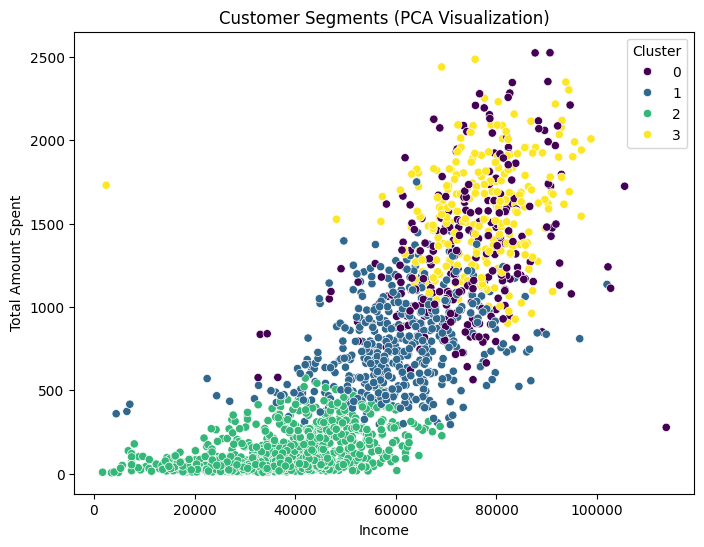

In [ ]:
 # visualization OF CLUSTER
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Customer Segments (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Income'], y=df['MntTotal'], hue=df['Cluster'], palette='viridis')
plt.xlabel('Income')
plt.ylabel('Total Amount Spent')
plt.title('Customer Segments (PCA Visualization)')
plt.show()




# **INSIGHTS AND RECOMMENTATIONS**

In [ ]:
#  Analyze each segment
cluster_summary = df.groupby('Cluster')[['Income', 'Recency', 'MntTotal']].mean()
cluster_summary['CustomerCount'] = df['Cluster'].value_counts()
print(cluster_summary)

# Define selected_features - these were the features used for clustering
selected_features = df[['Income', 'Recency', 'MntWines', 'MntFruits',
               'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
               'MntGoldProds', 'MntTotal']]


# See average feature values per cluster
df.groupby('Cluster')[selected_features.columns].mean()




               Income    Recency     MntTotal  CustomerCount
Cluster                                                     
0        73855.510345  49.041379  1320.237931            290
1        60264.361538  48.186538   757.030769            520
2        35693.841355  48.819073   120.891266           1122
3        77006.091575  51.322344  1559.989011            273


,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal
Cluster,,,,,,,,,
0,73855.510345,49.041379,489.272414,96.189655,405.603448,133.255172,100.044828,95.872414,1320.237931
1,60264.361538,48.186538,456.736538,23.238462,149.157692,33.555769,24.065385,70.276923,757.030769
2,35693.841355,48.819073,60.863636,5.121212,27.158645,7.319964,5.079323,15.348485,120.891266
3,77006.091575,51.322344,833.010989,45.765568,508.622711,69.402930,46.124542,57.062271,1559.989011


from matplotlib import pyplot as plt
_df_12['Income'].plot(kind='hist', bins=20, title='Income')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Recency'].plot(kind='hist', bins=20, title='Recency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['MntWines'].plot(kind='hist', bins=20, title='MntWines')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['MntFruits'].plot(kind='hist', bins=20, title='MntFruits')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='Income', y='Recency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='Recency', y='MntWines', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='MntWines', y='MntFruits', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='MntFruits', y='MntMeatProducts', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['Income'].plot(kind='line', figsize=(8, 4), title='Income')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['Recency'].plot(kind='line', figsize=(8, 4), title='Recency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22['MntWines'].plot(kind='line', figsize=(8, 4), title='MntWines')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['MntFruits'].plot(kind='line', figsize=(8, 4), title='MntFruits')
plt.gca().spines[['top', 'right']].set_visible(False)

# RECOMMENTATIONS ***LIST***

In [ ]:
# Recommendations:
print("\nInsights and Recommendations:")
print("1. Cluster 0: High spenders on Wines and Gold Products. Consider targeting them with loyalty programs or premium product bundles.")
print("2. Cluster 1: Low engagement online but active in-store shoppers. In-store discounts and exclusive store events could increase retention.")
print("3. Cluster 2: High web visits but low purchases. Consider retargeting with personalized online ads or abandoned cart emails.")
print("4. Cluster 3: Balanced across channels, moderate spending. They can be upsold through seasonal promotions and cross-sell strategies.")


Insights and Recommendations:
1. Cluster 0: High spenders on Wines and Gold Products. Consider targeting them with loyalty programs or premium product bundles.
2. Cluster 1: Low engagement online but active in-store shoppers. In-store discounts and exclusive store events could increase retention.
3. Cluster 2: High web visits but low purchases. Consider retargeting with personalized online ads or abandoned cart emails.
4. Cluster 3: Balanced across channels, moderate spending. They can be upsold through seasonal promotions and cross-sell strategies.
